# An Introduction to Data Manipulation for ML


---

Review: importing,

In [15]:
import statistics as s

In [16]:
s.mean([1, 2, 3])

2

This is a clearer way of importing functions as you can tell where the library is from.

In [17]:
import statistics as stat

In [18]:
stat.mode([1, 1, 2])

1

## Python Data Science Libraries

Python data science libraries have conventional *aliases*.

Python data science libraries are extremely fast *additions* to python which add highly efficient data processing tools.

Python itself is very slow (`for`, `if`, etc. are slow! as are lists...). These additions build in much faster data structures & operations. 

### Pandas

For tabular data, the data structure is called a "DataFrame" (aka. Table), 

In [8]:
import pandas as pd

In [19]:
film_db = {
    'ratings': [7, 8, 9],
    'sweets': [12, 15, 29]
}

A generic variable name `df` is often used, 

In [21]:
df = pd.DataFrame(film_db)

In [22]:
df

,ratings,sweets
0,7,12
1,8,15
2,9,29


**Q. Define your own dataframe called `health`, a healthcare dataset with `HeartRate` and `BloodPressure` columns.**

### NumPy

Pandas uses numpy. Numpy provides a fast "list" data structure, called an array. 

In [23]:
y_like = [1, 1, 0, 1, 0, 0]

In [10]:
import numpy as np

In [25]:
array = np.array(y_like)

In [29]:
array # much faster than python's

array([1, 1, 0, 1, 0, 0])

In [28]:
array.mean() # much faster than python's

0.5

### Seaborn

Seaborn is a simplified charting/plotting library,

In [32]:
# draw the plots in the notebook
%matplotlib inline  

import seaborn as sns

<AxesSubplot:>

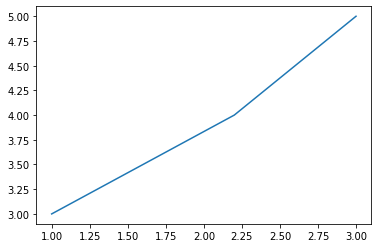

In [35]:
sns.lineplot(x=[1, 2.2, 3], y=[3, 4, 5])

**Q. with your health data, use `sns.scatterplot(x=.., y..)` to draw. Where `x=health['HeartRate']` and `y=health['BloodPressure']`.**

## Sci-Kit Learn

`sklean` is the mainstream simple machine learning library for python. As it is a collection of library, you almost always use `from sklearn import AMoreSpecificLibrary`. 

In [36]:
from sklearn.linear_model import LinearRegression

In [37]:
df

,ratings,sweets
0,7,12
1,8,15
2,9,29


All the Machine "Learning" happens in this line, 

In [209]:
X = df[['sweets']]
y = df['ratings']

lm = LinearRegression().fit(X,y)

**Q. Run `lm.score(X, y)` -- what does this tell you?**

In [45]:
print("The slope is: ", lm.coef_[0].round(2))
print("The intercept is:", lm.intercept_.round(2))

The slope is:  0.1
The intercept is: 6.07


In [48]:
yhat_ratings = lm.predict([
    [10],
    [20]
])

In [49]:
print("Some ratings predictions, ", yhat_ratings)

Some ratings predictions,  [7.10526316 8.13765182]


Aside: polynomial regression, see https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html


##### Example: KNN

In [50]:
from sklearn.neighbors import KNeighborsClassifier

In [52]:
df['like'] = [1, 1, 0]

In [53]:
df

,ratings,sweets,like
0,7,12,1
1,8,15,1
2,9,29,0


All the learning (learn = fit) happens here, 

In [213]:
knn = KNeighborsClassifier(2).fit(df[['ratings', 'sweets']], df['like'])

Once we have obtained the model, we can use it to predict, 

In [214]:
yhat_likes = knn.predict([
    [7, 10],
    [6, 21]
])

In [215]:
print("Some like/dislike predictions,", yhat_likes)

Some like/dislike predictions, [1 0]


**Q. Add to `.predict`'s input another row for `[10, 15]` ie., a film rating of `10` and ` sweet spend` of $£15$**.

----

### Aside: NetworkX

Graph/Network analysis library,

In [62]:
import networkx as nx

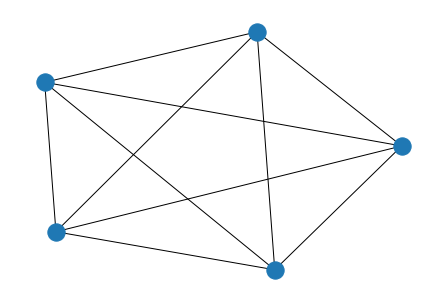

In [66]:
G = nx.random_graphs.complete_graph(5)

nx.draw(G)

The shortest paths between all nodes, 

In [68]:
list(nx.shortest_path_length(G))

[(0, {0: 0, 1: 1, 2: 1, 3: 1, 4: 1}),
 (1, {1: 0, 0: 1, 2: 1, 3: 1, 4: 1}),
 (2, {2: 0, 0: 1, 1: 1, 3: 1, 4: 1}),
 (3, {3: 0, 0: 1, 1: 1, 2: 1, 4: 1}),
 (4, {4: 0, 0: 1, 1: 1, 2: 1, 3: 1})]

In [221]:
G.remove_edge(u=0, v=1)

In [222]:
list(nx.shortest_path_length(G))

[(0, {0: 0, 2: 1, 3: 1, 4: 1, 1: 2}),
 (1, {1: 0, 2: 1, 3: 1, 4: 1, 0: 2}),
 (2, {2: 0, 0: 1, 1: 1, 3: 1, 4: 1}),
 (3, {3: 0, 0: 1, 1: 1, 2: 1, 4: 1}),
 (4, {4: 0, 0: 1, 1: 1, 2: 1, 3: 1})]

**EXTRA Q. Why did the shortest path lengths change? Redraw G.** 

---

## How do these libraries work together?

----

##### Aside: using seaborn for sample data

We are going to use a helper method seaborn provides which can supply sample data. We will save this to a csv file to simulate *starting with a dataset*, 

In [73]:
import seaborn as sns
sns.load_dataset('titanic').to_csv(open('titanic.csv', 'w'), index=False)

Seaborn makes some datasets available,

In [102]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'exercise',
 'flights',
 'fmri',
 'gammas',
 'geyser',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'taxis',
 'tips',
 'titanic']

---

### Using Pandas to Obtain a Cleaned Dataset

Import pandas,

In [74]:
import pandas as pd

Use `pd.read_csv` to load the csv file data into a *DataFrame*, called `ti`, 

In [76]:
ti = pd.read_csv('titanic.csv')

`.sample` to show a sample, here of 5 rows, 

In [77]:
ti.sample(5)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
54,0,1,male,65.0,0,1,61.9792,C,First,man,True,B,Cherbourg,no,False
804,1,3,male,27.0,0,0,6.9750,S,Third,man,True,NaN,Southampton,yes,True
528,0,3,male,39.0,0,0,7.9250,S,Third,man,True,NaN,Southampton,no,True
699,0,3,male,42.0,0,0,7.6500,S,Third,man,True,F,Southampton,no,True
711,0,1,male,NaN,0,0,26.5500,S,First,man,True,C,Southampton,no,True


**Q. Use `ti.head()` to show the first five rows.**

`.info()` provides structural information about the table, 

In [79]:
ti.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     891 non-null    int64  
 1   pclass       891 non-null    int64  
 2   sex          891 non-null    object 
 3   age          714 non-null    float64
 4   sibsp        891 non-null    int64  
 5   parch        891 non-null    int64  
 6   fare         891 non-null    float64
 7   embarked     889 non-null    object 
 8   class        891 non-null    object 
 9   who          891 non-null    object 
 10  adult_male   891 non-null    bool   
 11  deck         203 non-null    object 
 12  embark_town  889 non-null    object 
 13  alive        891 non-null    object 
 14  alone        891 non-null    bool   
dtypes: bool(2), float64(2), int64(4), object(7)
memory usage: 92.4+ KB


Consider the age column,

It's column index `3`, called `age` with `714` present rows, `float64` (ie., a partial number). 


```
3   age          714 non-null    float64

```

The `.shape` describes all the rows and columns,

In [80]:
ti.shape

(891, 15)

Aside: the `len(ti)` is the first part of the `.shape`, ie., its the number of rows,

In [89]:
len(ti)

891

Consider the age column `ti['age']`,

In [84]:
ti['age']

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888     NaN
889    26.0
890    32.0
Name: age, Length: 891, dtype: float64

**Q. Show the `fare` column.**

We can ask, of this column, if any data is **n**ot **a**vailable,

In [85]:
ti['age'].isna()

0      False
1      False
2      False
3      False
4      False
       ...  
886    False
887    False
888     True
889    False
890    False
Name: age, Length: 891, dtype: bool

We can use `.sum()` to count the `True`s (recall: `True` is `1`, and `False` is `0`).

In [87]:
ti['age'].isna().sum()

177

We can do this to the entire table, which applies this to *all columns*, 

In [88]:
ti.isna().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

The `.mean` is the *rate* of `True`, ie., percentage of missing data, 

In [93]:
ti.isna().mean()

survived       0.000000
pclass         0.000000
sex            0.000000
age            0.198653
sibsp          0.000000
parch          0.000000
fare           0.000000
embarked       0.002245
class          0.000000
who            0.000000
adult_male     0.000000
deck           0.772166
embark_town    0.002245
alive          0.000000
alone          0.000000
dtype: float64

**Q. Use `ti.describe` to report similar summary information. What do the descriptions say?** 

Since almost all the data in `deck` is missing, let's remove the column entirely,

In [94]:
ti_clean = ti.drop(columns=['deck'])

... `.drop(columns=[])` takes a list of columns to remove.

Consider `.info()` on the clean table -- there is no `deck` column,

In [96]:
ti_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     891 non-null    int64  
 1   pclass       891 non-null    int64  
 2   sex          891 non-null    object 
 3   age          714 non-null    float64
 4   sibsp        891 non-null    int64  
 5   parch        891 non-null    int64  
 6   fare         891 non-null    float64
 7   embarked     889 non-null    object 
 8   class        891 non-null    object 
 9   who          891 non-null    object 
 10  adult_male   891 non-null    bool   
 11  embark_town  889 non-null    object 
 12  alive        891 non-null    object 
 13  alone        891 non-null    bool   
dtypes: bool(2), float64(2), int64(4), object(6)
memory usage: 85.4+ KB


...we cannot run missing values into a Machine Learning Algorithm...

We now just remove any row with missing data, 

In [97]:
ti_clean = ti_clean.dropna() # drop all rows which have NotAvailable data

There are no missing rows in any column now, 

In [101]:
ti_clean.isna().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
embark_town    0
alive          0
alone          0
dtype: int64

---

###### Using Pandas

Querying a dataframe is the same as indexing it, 

In [106]:
query = 'age' # column name

ti[ query ]

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888     NaN
889    26.0
890    32.0
Name: age, Length: 891, dtype: float64

We can use a list of column names, 

In [107]:
query = ['age', 'fare', 'sex']

ti[ query ]

,age,fare,sex
0,22.0,7.2500,male
1,38.0,71.2833,female
2,26.0,7.9250,female
3,35.0,53.1000,female
4,35.0,8.0500,male
...,...,...,...
886,27.0,13.0000,male
887,19.0,30.0000,female
888,NaN,23.4500,female
889,26.0,30.0000,male


**Q. Select the `embark_town` and `sex` columns using a list of column names.**

In one go, reading `ti[` "FIND in `ti`" the list of columns `['age', 'sex']`,

In [109]:
ti[['age', 'sex']] 

,age,sex
0,22.0,male
1,38.0,female
2,26.0,female
3,35.0,female
4,35.0,male
...,...,...
886,27.0,male
887,19.0,female
888,NaN,female
889,26.0,male


You can also filter rows, 

In [112]:
ti_males = ti[   ti['sex']   == "male"   ]

In [114]:
ti_males.sample(3) # randomly select 3

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
768,0,3,male,NaN,1,0,24.15,Q,Third,man,True,NaN,Queenstown,no,False
560,0,3,male,NaN,0,0,7.75,Q,Third,man,True,NaN,Queenstown,no,True
525,0,3,male,40.5,0,0,7.75,Q,Third,man,True,NaN,Queenstown,no,True


#### Have we biased the dataset?

In our machine learning problem, suppose, we are interested in predicting $y$ survival from $X$ (age, pclass, fare).

So we are only interested in whether we have biased these columns.

We'll define some variables which are just lists of the column names we are interested in. 

In [123]:
# P(y|X) = P(Survive|Age, Class, Fare)

features = ['age', 'pclass', 'fare'] # X = knownable features
target = 'survived'                  # y = did the passenger survive?

both = features + [target]

---

##### Aside: combining two lists, 

In [124]:
[1, 2, 3, ] + [4]

[1, 2, 3, 4]

---

Let's visually inspect (using `print()`) their means, stdvs, etc. 

In [130]:
print(ti[both].mean())
print()
print(ti[both].std())

age         29.699118
pclass       2.308642
fare        32.204208
survived     0.383838
dtype: float64

age         14.526497
pclass       0.836071
fare        49.693429
survived     0.486592
dtype: float64


In [131]:
print(ti_clean[both].mean())
print()
print(ti_clean[both].std())

age         29.642093
pclass       2.240169
fare        34.567251
survived     0.404494
dtype: float64

age         14.492933
pclass       0.836854
fare        52.938648
survived     0.491139
dtype: float64


Let's directly compare, 

In [138]:
(ti[both].mean() - ti_clean[both].mean())

age         0.057025
pclass      0.068473
fare       -2.363043
survived   -0.020656
dtype: float64

... and so on ...

The `fare` column has a $£2$ difference before/after cleaning -- but the original fares were hugely varied anyway... so this is unlikely to be a statistically significant difference. 

In [134]:
ti['fare'].mean() - ti_clean['fare'].mean()

-2.3630434359197494

**Q. show the difference of their standard deviations**

**Q. show the difference of their means as a percentage of a difference of their standard deviations**

If we use `.describe()` to compute a vareity of descriptive measures, we can see there are huge variations in `fare`, 

In [133]:
ti['fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: fare, dtype: float64

Suppose we conclude (and here we can) that the dataset after cleaning is still represenative of the original.

Let's proceed to Machine Learning.

### Using Sklearn to Solve a Machine Learning Problem

In [139]:
from sklearn.neighbors import KNeighborsClassifier

In [141]:
print(features) 
print(target)

['age', 'pclass', 'fare']
survived


The machine "**learning**",

In [142]:
k = 5
X = ti_clean[features]
y = ti_clean[target]

model = KNeighborsClassifier(k).fit(X, y)

**Q. Using `model.score(X, y)` compute a score for this model.**

**Q. change `k` to 1, 3, 5, etc. and re-run `model.score(X, y)` -- why does the score change**

We have the model, let's predict, 

Suppose we encounter four passengers on the titanic, here just sample from the original dataset, 

In [146]:
X_new = ti_clean[features].sample(4)

X_new

,age,pclass,fare
506,33.0,2,26.00
559,36.0,3,17.40
665,32.0,2,73.50
142,24.0,3,15.85


According to our model,

In [147]:
model.predict(X_new)

array([1, 1, 1, 1])

Run a few times to see some different predictions, given we are choosing `4` people at random, 

In [158]:
model.predict(ti_clean[features].sample(4))

array([0, 1, 0, 0])

**Q. show predictions for a sample of 10 people.**

We can "naively" evaluate the quality of this model using `.score`, 

In [159]:
model.score(X, y)

0.7612359550561798

Here we ask the model to use `X` to make predictions and these are compared to `y`. 

Note that we are just reusing the original `X`, and `y` -- problem: it has already seen these! (Cheating...)

This score will almost always be almost 100% *trivially*, because `.score` is simply asking the model to find a point it has already seen, 

In [163]:
#                        REMEMBER    PREDICT (FIND X, y  == y)
KNeighborsClassifier(1).fit(X, y).score(X, y)

0.9676966292134831

To evaluate a model in an unbiased way, we need to score the model on data it hasnt seen,

In [164]:
from sklearn.model_selection import train_test_split

`train_test_split` partitions the original dataset into four, 

In [165]:
Xtr, Xte, ytr, yte = train_test_split(X, y)

The number of points in the training set, by default, is $75\%$, 

In [169]:
len(ytr)/len(y) # training / total

0.75

In [170]:
len(yte)/len(y) # test / total 

0.25

To get an unbiased score we `.fit` on training and `.score` on testing,

In [171]:
model.fit(Xtr, ytr).score(Xte, yte)

0.5898876404494382

This number is a somewhat more accurate sense of how good the model is, as it is now being tested on points it has **not** seen. 

Eg., 

In [174]:
train_model = model.fit(Xtr, ytr)

In [173]:
Xte.sample(3)

,age,pclass,fare
183,1.0,2,39.000
777,5.0,3,12.475
757,18.0,2,11.500


ie., this `.predict` samples points from an unseen testing set, 

In [175]:
train_model.predict(Xte.sample(3))

array([1, 0, 0])

### Using Seaborn to Visualize this Process

In [176]:
import seaborn as sns

`.scatterplot`, of a couple of columns to explore/visualise what data we're working with, 

<AxesSubplot:xlabel='age', ylabel='fare'>

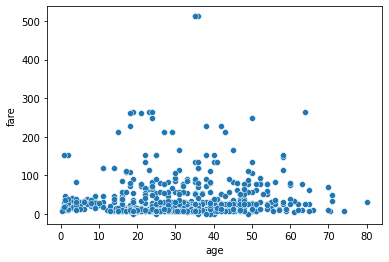

In [178]:
sns.scatterplot(x=ti_clean['age'], y=ti_clean['fare'])

We are interested mostly in how our `features` ($X$) related to our `target`, ie., $y$ -- survival. 

How much difference is there in the ages of people who survived/died?

<AxesSubplot:xlabel='survived', ylabel='age'>

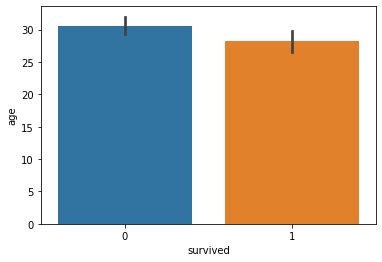

In [180]:
sns.barplot(x=ti_clean['survived'], y=ti_clean['age'])

**Q. change this to a violinplot**

How do people different in their cabin class?

<AxesSubplot:xlabel='pclass', ylabel='survived'>

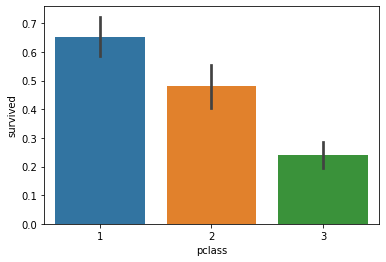

In [182]:
sns.barplot(x=ti_clean['pclass'], y=ti_clean['survived'])

**Q. change this to a violinplot**

How do people differ in their fares?

<AxesSubplot:xlabel='survived', ylabel='fare'>

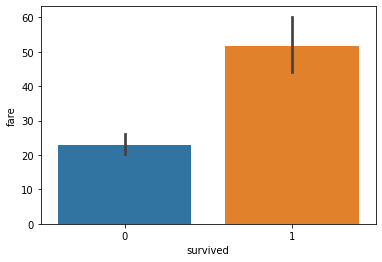

In [183]:
sns.barplot(x=ti_clean['survived'], y=ti_clean['fare'])

**Q. change this to a violinplot**

Note the age barplot above, that it reduced all the ages of different survival groups down to a mean -- and the mean heights weren't that different...


A `violinplot` exposes the whole shape of the distribution (ie., counts of entries). 

<AxesSubplot:xlabel='survived', ylabel='age'>

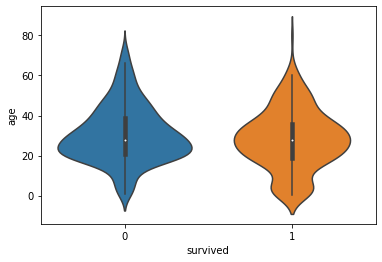

In [184]:
sns.violinplot(x=ti_clean['survived'], y=ti_clean['age'])

Using this graph we can see, along the horiztonal `age = 0 to 5`, there is a much bigger area in the survival graph. This shows that many more young children survived than died. 

<AxesSubplot:xlabel='pclass', ylabel='age'>

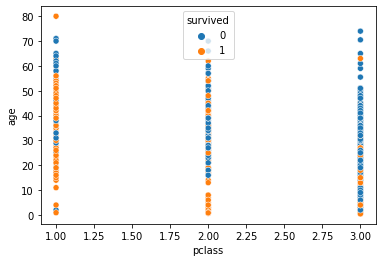

In [224]:
sns.scatterplot(x=ti_clean['pclass'], y=ti_clean['age'], hue=ti_clean['survived'])

---

## Appendix: Comparing Models

The best sort of visualization of a classification model requires coloring in the background using predictions for all the points on the graph, 

<img src=https://scikit-learn.org/0.15/_images/plot_classifier_comparison_0011.png />